In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_df = pd.read_csv('Google_Stock_Price_Train.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [3]:
test_df = pd.read_csv('Google_Stock_Price_Test.csv')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


In [4]:
train = train_df.loc[:,["Open"]].values
train.shape

(1258, 1)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)

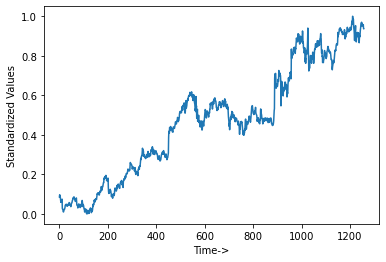

In [6]:
plt.plot(train_scaled)
plt.ylabel("Standardized Values")
plt.xlabel("Time->")
plt.show()

In [7]:
x_train = []
y_train = []
time = 60
for i in range(60,train_scaled.shape[0]):
    x_train.append(train_scaled[i-60:i,0])
    y_train.append(train_scaled[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)

In [8]:
x_train.shape,y_train.shape

((1198, 60), (1198,))

In [9]:
x_train = np.reshape(x_train,newshape=(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1198, 60, 1)

In [12]:

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN,Dropout,LSTM

In [14]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(x_train,y_train,epochs=100,batch_size=30,validation_split=0.05)

Epoch 1/100
38/38 [==============================] - 14s 149ms/step - loss: 0.0295 - val_loss: 0.0051
Epoch 2/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 3/100
38/38 [==============================] - 3s 92ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 4/100
38/38 [==============================] - 4s 95ms/step - loss: 0.0012 - val_loss: 9.6497e-04
Epoch 5/100
38/38 [==============================] - 4s 94ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 6/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0011 - val_loss: 8.9062e-04
Epoch 7/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 8/100
38/38 [==============================] - 3s 92ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 9/100
38/38 [==============================] - 4s 92ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 10/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0010 - val_lo

Epoch 77/100
38/38 [==============================] - 4s 92ms/step - loss: 3.5812e-04 - val_loss: 3.8665e-04
Epoch 78/100
38/38 [==============================] - 3s 91ms/step - loss: 3.0521e-04 - val_loss: 3.1767e-04
Epoch 79/100
38/38 [==============================] - 4s 92ms/step - loss: 3.2018e-04 - val_loss: 3.3024e-04
Epoch 80/100
38/38 [==============================] - 4s 93ms/step - loss: 3.2867e-04 - val_loss: 3.1090e-04
Epoch 81/100
38/38 [==============================] - 4s 93ms/step - loss: 3.1117e-04 - val_loss: 3.7082e-04
Epoch 82/100
38/38 [==============================] - 3s 89ms/step - loss: 3.0171e-04 - val_loss: 6.2488e-04
Epoch 83/100
38/38 [==============================] - 4s 92ms/step - loss: 3.0588e-04 - val_loss: 4.8478e-04
Epoch 84/100
38/38 [==============================] - 3s 91ms/step - loss: 3.1403e-04 - val_loss: 3.8703e-04
Epoch 85/100
38/38 [==============================] - 3s 90ms/step - loss: 4.3576e-04 - val_loss: 3.9741e-04
Epoch 86/100
38/38 

In [16]:
data = pd.concat((train_df['Open'],test_df['Open']),axis=0)
test_input = data.iloc[len(data) - len(test_df) - time : ].values
test_input.shape

(80,)

In [17]:
test_input = test_input.reshape(-1,1)
test_input.shape

(80, 1)

In [18]:
test_scaled = scaler.transform(test_input)

In [19]:
x_test = []
for i in range(time,test_scaled.shape[0]):
    x_test.append(test_scaled[i - time: i,0 ])
x_test = np.array(x_test)
x_test.shape

(20, 60)

In [20]:
x_test = np.reshape(x_test,newshape=(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(20, 60, 1)

In [21]:
y_test = test_df.loc[:,"Open"].values

In [22]:
y_pred = model.predict(x_test)

1/1 [==============================] - 2s 2s/step


In [23]:
y_pred = scaler.inverse_transform(y_pred)

In [24]:
output = model.evaluate(x=x_test,y=y_test)

1/1 [==============================] - 2s 2s/step - loss: 650700.2500


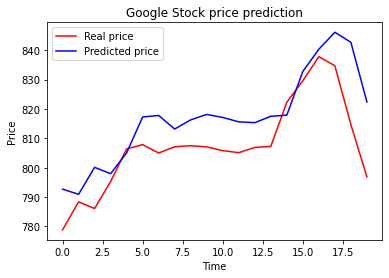

In [25]:
plt.plot(y_test, color = 'red', label = 'Real price')
plt.plot(y_pred, color = 'blue', label = 'Predicted price')

plt.title('Google Stock price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [26]:
time

60